<a href="https://colab.research.google.com/github/kunjkinger/tensor_flow/blob/main/linear_regression_using_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
x_data = np.linspace(0.0,10,1000000)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [6]:
noise.shape

(1000000,)

y = mx+b

b=5

In [7]:
y_true = (0.5*x_data) + 5 + noise

In [8]:
x_df = pd.DataFrame(data = x_data,columns=['x data'])

In [9]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [10]:
my_data = pd.concat([x_df,y_df],axis=1)

In [11]:
my_data

,x data,Y
0,0.00000,5.351481
1,0.00001,3.572298
2,0.00002,6.729854
3,0.00003,4.552735
4,0.00004,4.828497
...,...,...
999995,9.99996,9.472264
999996,9.99997,9.344042
999997,9.99998,11.621873
999998,9.99999,12.414172


In [12]:
my_data.head()

,x data,Y
0,0.00000,5.351481
1,0.00001,3.572298
2,0.00002,6.729854
3,0.00003,4.552735
4,0.00004,4.828497


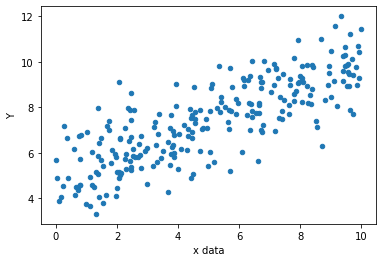

In [13]:
my_data.sample(n=250).plot(kind='scatter',x='x data',y='Y')

In [14]:
batch_size = 8

In [15]:
m = tf.Variable(0.75)
b = tf.Variable(0.99)

In [16]:
np.random.randn(2)

array([-0.85469519, -0.59012216])

In [17]:
xph = tf.placeholder(tf.float32,[batch_size])

In [18]:
yph = tf.placeholder(tf.float32,[batch_size])

In [19]:
y_model = m*xph + b

In [20]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [21]:
optimizr = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizr.minimize(error)

In [22]:
init = tf.global_variables_initializer()

In [23]:
with tf.Session() as sess:

  sess.run(init)
  batches = 1000
  
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data),size=batch_size)

    feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
    sess.run(train,feed_dict = feed)
  
  model_m,model_b = sess.run([m,b])

In [24]:
model_m

0.5426358

In [25]:
model_b

4.915105

In [26]:
y_hat = x_data*model_m + model_b

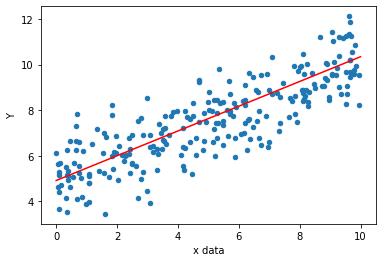

In [27]:
my_data.sample(250).plot(kind='scatter',x='x data',y='Y')
plt.plot(x_data,y_hat,'r')

TF Estimator

In [28]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [29]:
feat_cols

[NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [30]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols) 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_7nj_1_n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [33]:
x_train.shape

(700000,)

In [36]:
x_test.shape

(300000,)

In [37]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,batch_size=8,num_epochs=None,shuffle=True)

In [38]:
train_input_func = input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [39]:
test_input_func = input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test}, y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [40]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp_7nj_1_n/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 514.16614, step = 1
INFO:tensorflow:global_step/sec: 702.021
INFO:tensorflow:loss = 14.592442, step = 101 (0.148 sec)
INFO:tensorflow:global_step/sec: 803.787
INFO:tensorflow:loss = 23.768341, step = 201 (0.126 sec)
INFO:tensorflow:global_step/sec: 816.187
INFO:tensorflow:loss = 11.52102, step = 301 (0.125 sec)
INFO:tensorflow:global_step/sec: 747.038
INFO:tensorflow:loss = 15.60202, step = 401 (0.132 sec)
INFO:tensorflow:global_step/sec: 789.225
INFO:tensorflow:

In [41]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-18T01:26:50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_7nj_1_n/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 1.25807s
INFO:tensorflow:Finished evaluation at 2021-06-18-01:26:51
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1118404, global_step = 1000, label/mean = 7.4856253, loss = 8.894723, prediction/mean = 7.4864397
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp_7nj_1_n/model.ckpt-1000


In [42]:
test_metrics = estimator.evaluate(input_fn=test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-06-18T01:28:04


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_7nj_1_n/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Inference Time : 1.22707s
INFO:tensorflow:Finished evaluation at 2021-06-18-01:28:06
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1083639, global_step = 1000, label/mean = 7.4843884, loss = 8.866911, prediction/mean = 7.464177
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp_7nj_1_n/model.ckpt-1000


In [43]:
print('training data metrics')
print(train_metrics)

training data metrics
{'average_loss': 1.1118404, 'label/mean': 7.4856253, 'loss': 8.894723, 'prediction/mean': 7.4864397, 'global_step': 1000}


In [44]:
print('test metrics')
print(test_metrics)

test metrics
{'average_loss': 1.1083639, 'label/mean': 7.4843884, 'loss': 8.866911, 'prediction/mean': 7.464177, 'global_step': 1000}


In [45]:
brand_new_data = np.linspace(0,10,10)

In [46]:
input_func_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [48]:
list(estimator.predict(input_func_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_7nj_1_n/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


[{'predictions': array([4.40516], dtype=float32)},
 {'predictions': array([5.08958], dtype=float32)},
 {'predictions': array([5.774], dtype=float32)},
 {'predictions': array([6.45842], dtype=float32)},
 {'predictions': array([7.14284], dtype=float32)},
 {'predictions': array([7.8272595], dtype=float32)},
 {'predictions': array([8.51168], dtype=float32)},
 {'predictions': array([9.196099], dtype=float32)},
 {'predictions': array([9.88052], dtype=float32)},
 {'predictions': array([10.5649395], dtype=float32)}]

In [49]:
predictions = []

for pred in estimator.predict(input_func_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_7nj_1_n/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [50]:
predictions

[array([4.40516], dtype=float32),
 array([5.08958], dtype=float32),
 array([5.774], dtype=float32),
 array([6.45842], dtype=float32),
 array([7.14284], dtype=float32),
 array([7.8272595], dtype=float32),
 array([8.51168], dtype=float32),
 array([9.196099], dtype=float32),
 array([9.88052], dtype=float32),
 array([10.5649395], dtype=float32)]

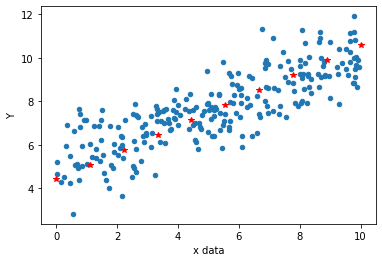

In [53]:
my_data.sample(n=250).plot(kind='scatter',x='x data',y='Y')
plt.plot(brand_new_data,predictions,'r*')